Steps and tasks:
1. Import the necessary libraries
2. Read the data as a data frame
3. Perform basic EDA which should include the following
and print out your insights at every step.
        a. Shape of the data
        b. Data type of each attribute
        c. Checking the presence of missing values
        d. 5 point summary of numerical attributes
        e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
        f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’
        columns
        g. Checking the presence of outliers in ‘bmi’, ‘age’ and
        ‘charges columns
        h. Distribution of categorical columns (include
        children)
        i. Pair plot that includes all the columns of the data
        frame
4. Answer the following questions with statistical evidence
        a. Do charges of people who smoke differ significantly
            from the people who don't?     unpaired ttest
        b. Does bmi of males differ significantly from that of
            females?     unpaired ttest
        c. Is the proportion of smokers significantly different
            in different genders?   chi2 test
        d. Is the distribution of bmi across women with no
            children, one child and two children, the same ?   annova

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#%inline matplotlib

In [2]:
insu = pd.read_csv("insurance.csv")

In [3]:
insu.shape

(1338, 7)

In [4]:
insu.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insu.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [6]:
insu.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [7]:
insu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1. Age,bmi have similar mean and median, suggesting normal curve.
2. Out of 1338, 676 are male.
3. Out of 1338, 1064 are non smoking.
4. No null/empty columns.
5. Datatypes are also proper.


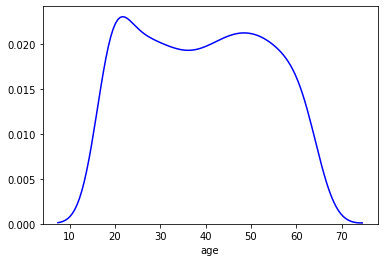

In [8]:
# Distribution of age
sns.distplot(insu["age"],hist=False,color="B")

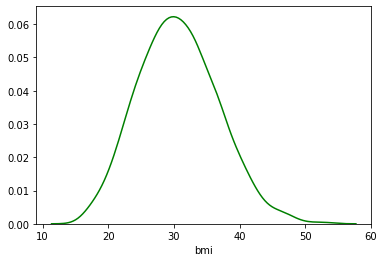

In [9]:
# Distribution of bmi.
sns.distplot(insu["bmi"],hist=False,color="G")


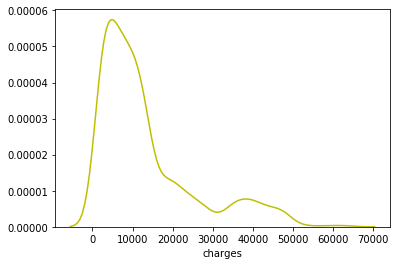

In [10]:
# Distribution of charges
sns.distplot(insu["charges"],hist=False,color="Y")

  f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’
      columns
  g. Checking the presence of outliers in ‘bmi’, ‘age’ and
      ‘charges columns
  

In [11]:
bmiskew = insu["bmi"].skew()
ageskew = insu["age"].skew()
chargeskew = insu["charges"].skew()
print("Bmiskew is %f, ageskew is %f, chargeskew is %f" % (bmiskew,ageskew,chargeskew))

Bmiskew is 0.284047, ageskew is 0.055673, chargeskew is 1.515880


#Age is least skewed and charges are highly right skewed.

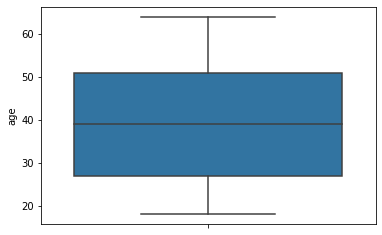

In [12]:
sns.boxplot(x = "age" ,orient="v", data = insu)
# no outliers and symmetric

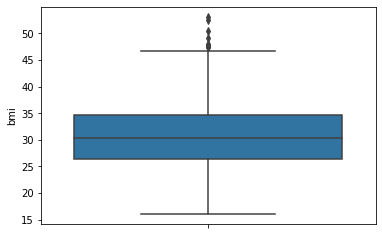

In [13]:
sns.boxplot(x = "bmi" ,orient="v", data = insu)
# some high outliers

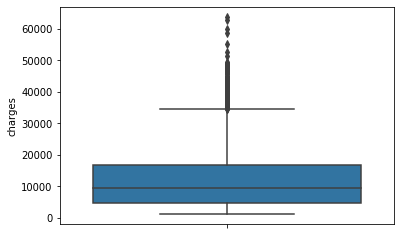

In [14]:
sns.boxplot(x = "charges" ,orient="v", data = insu)
# many high outliers

  h. Distribution of categorical columns (include
      children)
  i. Pair plot that includes all the columns of the data
      frame

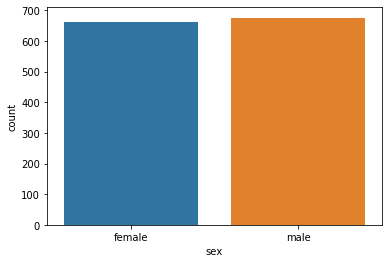

In [15]:
sns.countplot(insu["sex"])

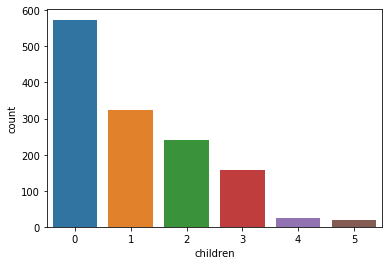

In [16]:
sns.countplot(insu["children"])

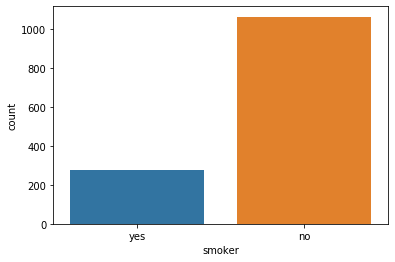

In [17]:
sns.countplot(insu["smoker"])

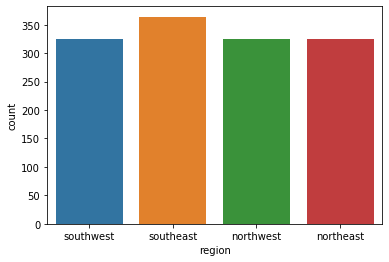

In [18]:
sns.countplot(insu["region"])

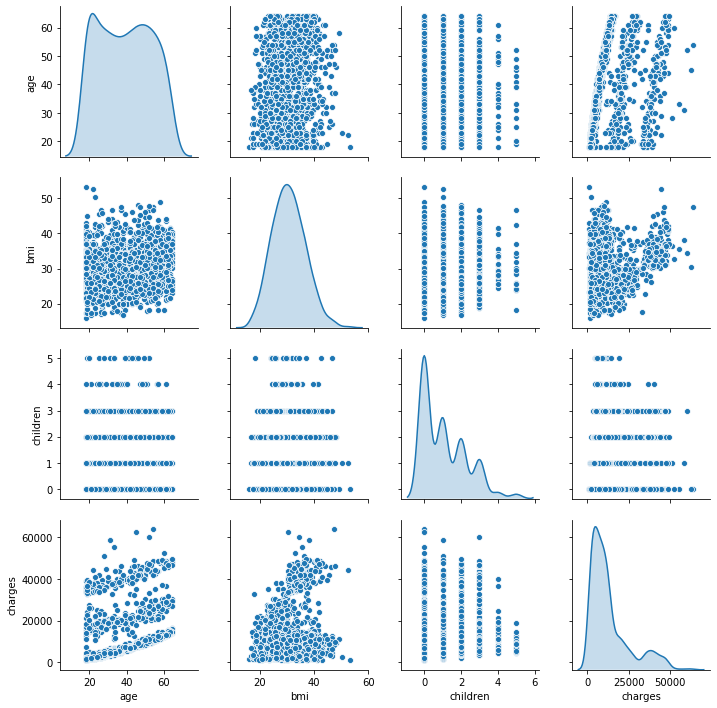

In [19]:
sns.pairplot(insu,diag_kind='kde')

 - Age and charges looks highly correlated. 
 - Bmi has perfect normal curve
 - No logical benefit of scatter plots of categorical variables.

4. Answer the following questions with statistical evidence
        a. Do charges of people who smoke differ significantly
            from the people who don't?     unpaired ttest
        b. Does bmi of males differ significantly from that of
            females?     unpaired ttest
        c. Is the proportion of smokers significantly different
          in different genders?  
        d. Is the distribution of bmi across women with no
            children, one child and two children, the same ?

In [43]:
#a. Do charges of people who smoke differ significantly from the people who don't?

smokers = insu[insu["smoker"] == "yes"]
nonsmokers = insu[insu["smoker"] == "no"]

tstat, pvalue = stats.ttest_ind(smokers.charges.to_numpy(),nonsmokers.charges.to_numpy())
print("pvalue:",pvalue)
if(pvalue <0.05):
    print("Reject null hypothesis")
    print("Charges for people who smoke is different from those who do not.")
else:
    print("Fail to reject null hypothesis")
    print("Hence charges for smokers and non smokers are same")

pvalue: 8.271435842177219e-283
Reject null hypothesis
Charges for people who smoke is different from those who do not.


In [50]:
#smokers.charges.mean()
#sns.distplot(smokers["charges"],hist=False)
#sns.distplot(nonsmokers["charges"],hist=False)

In [62]:
 # b. Does bmi of males differ significantly from that of females?     unpaired ttest

males = insu[insu["sex"] == "male"]
females = insu[insu["sex"] == "female"]

tstat, pvalue = stats.ttest_ind(males.bmi.to_numpy(),females.bmi.to_numpy())
print("pvalue:",pvalue)
if(pvalue <0.05):
    print("Reject null hypothesis")
    print("BMI for males is different from that of females")
else:
    print("Fail to reject null hypothesis")
    print("Hence BMI for males is not different from that of females")

pvalue: 0.08997637178984932
Fail to reject null hypothesis
Hence BMI for males is not different from that of females


In [127]:
# c. Is the proportion of smokers significantly different in different genders?

males_smo_count = males[males["smoker"] == "yes"]["smoker"].count()
males_nsmo_count = males[males["smoker"] == "no"]["smoker"].count()
females_smo_count = females[females["smoker"] == "yes"]["smoker"].count()
females_nsmo_count = females[females["smoker"] == "no"]["smoker"].count()

quality_array = np.array([[males_smo_count,males_nsmo_count],[females_smo_count,females_nsmo_count]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)
print("pvalue:",p_value)
if(pvalue <0.05):
    print("Reject null hypothesis")
    print("Proportion of smokers is significantly different for different genders")
else:
    print("Fail to reject null hypothesis")
    print("Proportion of smokers is not significantly different for different genders")

pvalue: 0.006548143503580674
Fail to reject null hypothesis
Proportion of smokers is not significantly different for different genders


In [128]:
# d. Is the distribution of bmi across women with no children, one child and two children, the same ?
zeroChildFemale = females[females["children"] == 0]["bmi"].to_numpy()
oneChildFemale = females[females["children"] == 1]["bmi"].to_numpy()
twoChildFemale = females[females["children"] == 2]["bmi"].to_numpy()

fstat,pvalue = stats.f_oneway(zeroChildFemale,oneChildFemale,twoChildFemale)
print("pvalue:",p_value)
if(pvalue <0.05):
    print("Reject null hypothesis")
    print("Distribution of bmi across women with no children, one child and two children is significantly different")
else:
    print("Fail to reject null hypothesis")
    print("Distribution of bmi across women with no children, one child and two children is not significantly different")

pvalue: 0.006548143503580674
Fail to reject null hypothesis
Distribution of bmi across women with no children, one child and two children is not significantly different


In [129]:
#Get count, mean and std deviation for confirmation of result
print("Zero child women count:", zeroChildFemale.size, "mean:", zeroChildFemale.mean(), "std deviation:", zeroChildFemale.std())
print("One child women count:", oneChildFemale.size, "mean:", oneChildFemale.mean(), "std deviation:", oneChildFemale.std())
print("Two child women count:", twoChildFemale.size, "mean:", twoChildFemale.mean(), "std deviation:", twoChildFemale.std())

#It looks from mean and std deviation values that it is not much different.
#zeroChildFemale.size
#(zeroChildFemale.size,oneChildFemale.size,twoChildFemale.size)

Zero child women count: 289 mean: 30.36152249134948 std deviation: 5.95660186797036
One child women count: 158 mean: 30.0526582278481 std deviation: 5.7684892245565225
Two child women count: 119 mean: 30.64978991596638 std deviation: 6.600291609134599


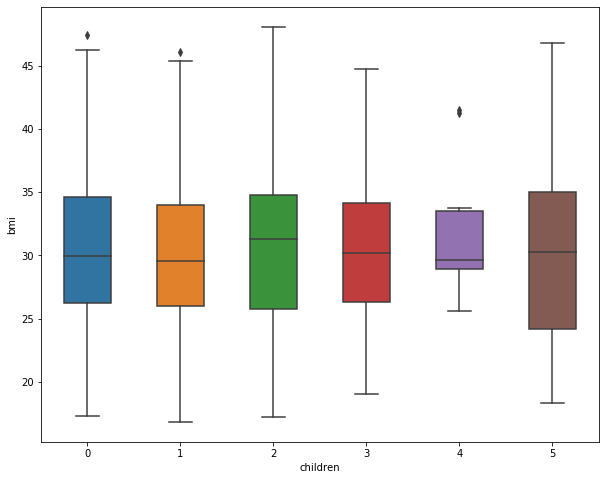

In [102]:
# checking results with visualization
fig=plt.figure(figsize=(10,8))
sns.boxplot(x = "children", y = "bmi", data = females,width= .5)
# boxplot also suggests that not much distribution difference for females with 0,1 or 2 children.